In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [39]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [40]:
train_data.shape

(30161, 14)

In [41]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

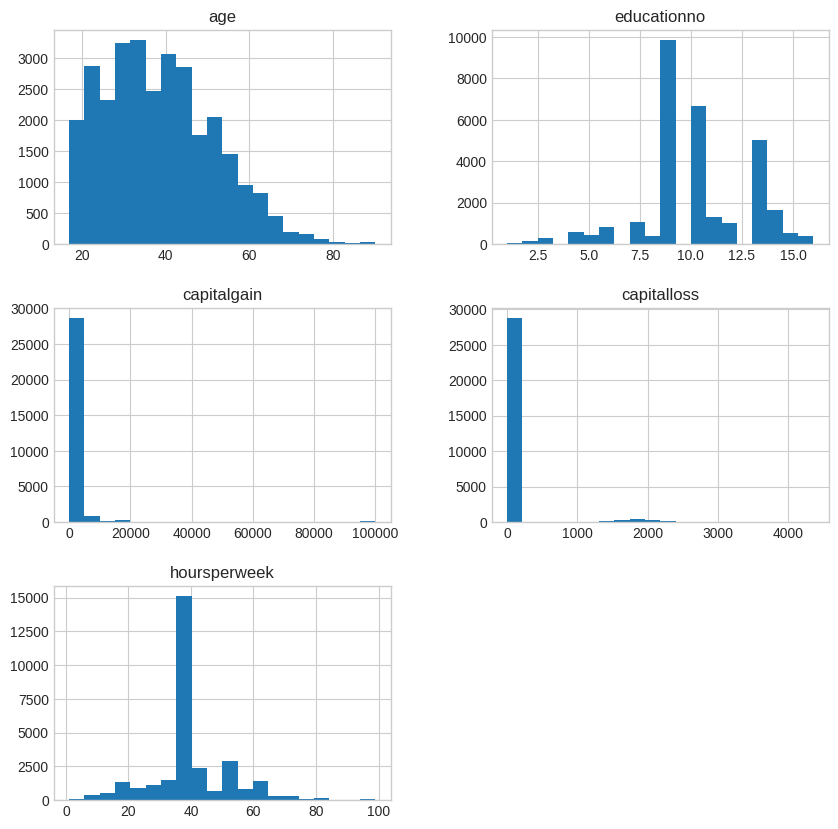

In [43]:
train_data.hist(figsize=(10,10), bins=20)

In [8]:
test_data = pd.read_csv('SalaryData_Test(1).csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
test_data.shape

(15060, 14)

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

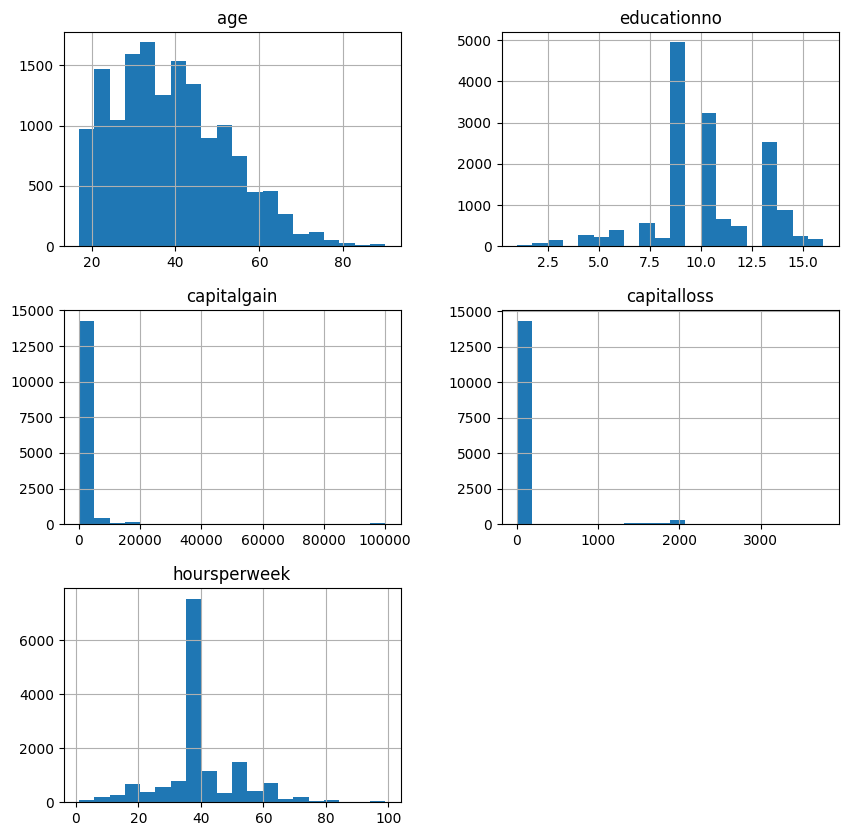

In [13]:
test_data.hist(figsize=(10,10), bins=20)

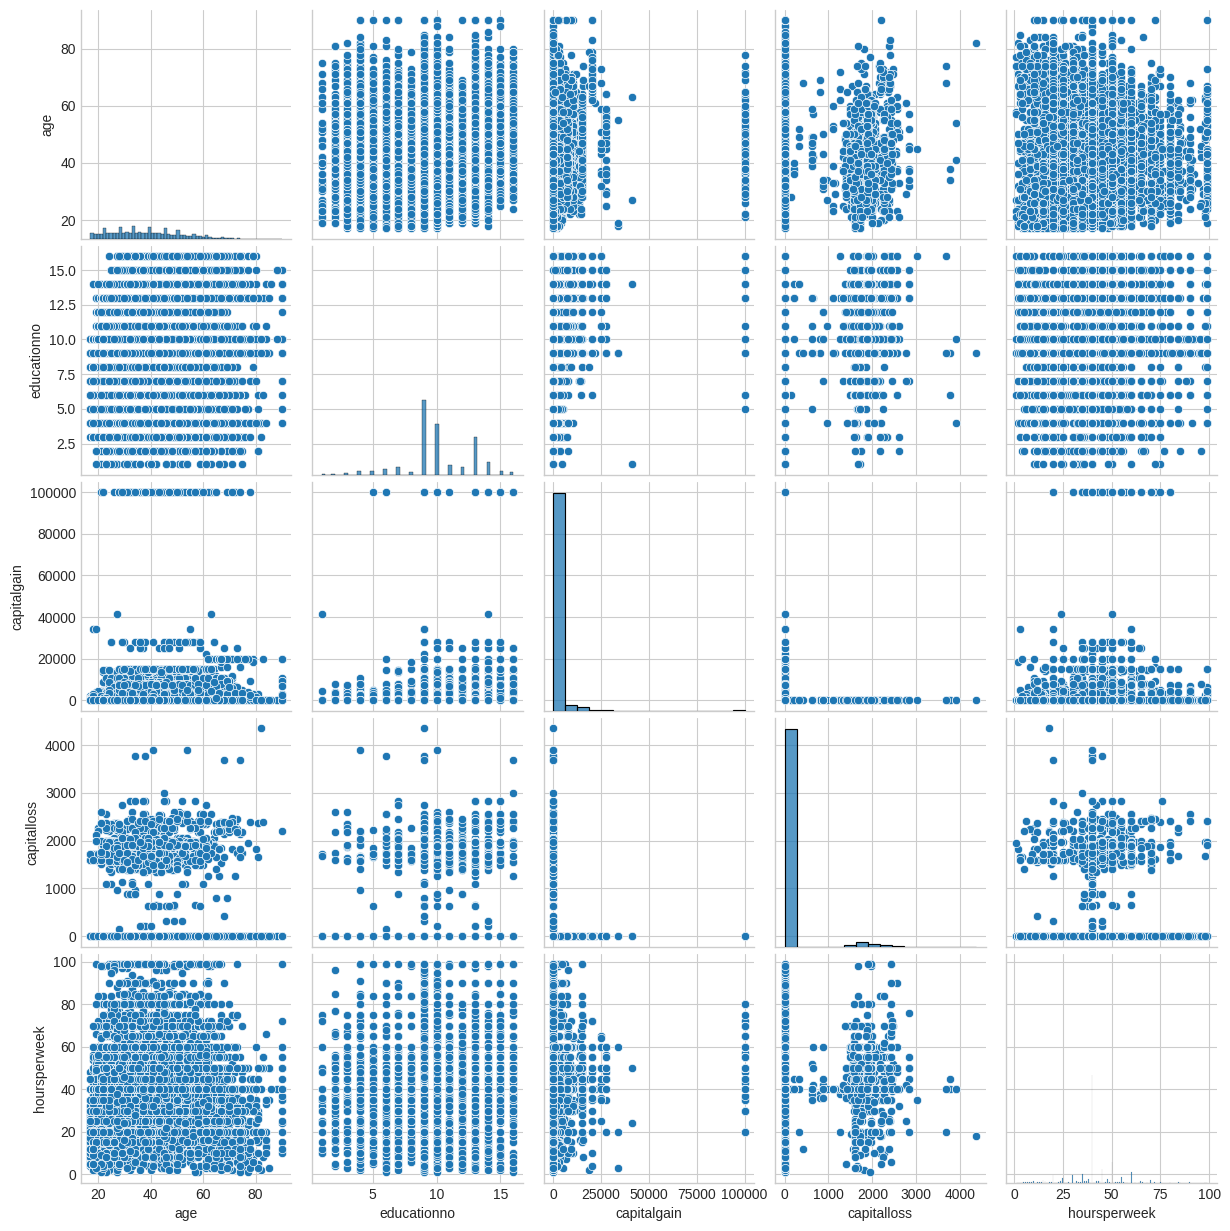

In [44]:
import seaborn as sns
sns.pairplot(train_data)
plt.show()


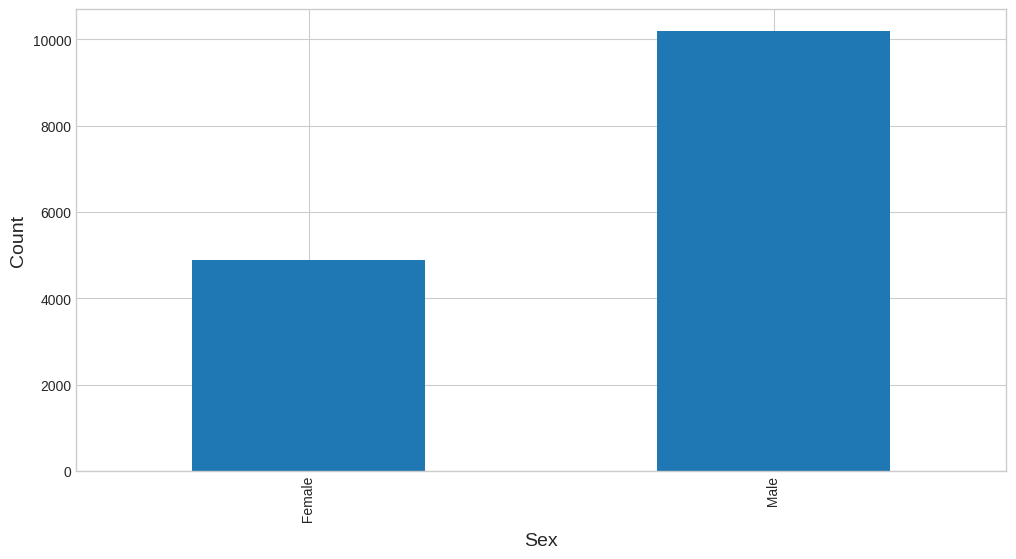

In [45]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

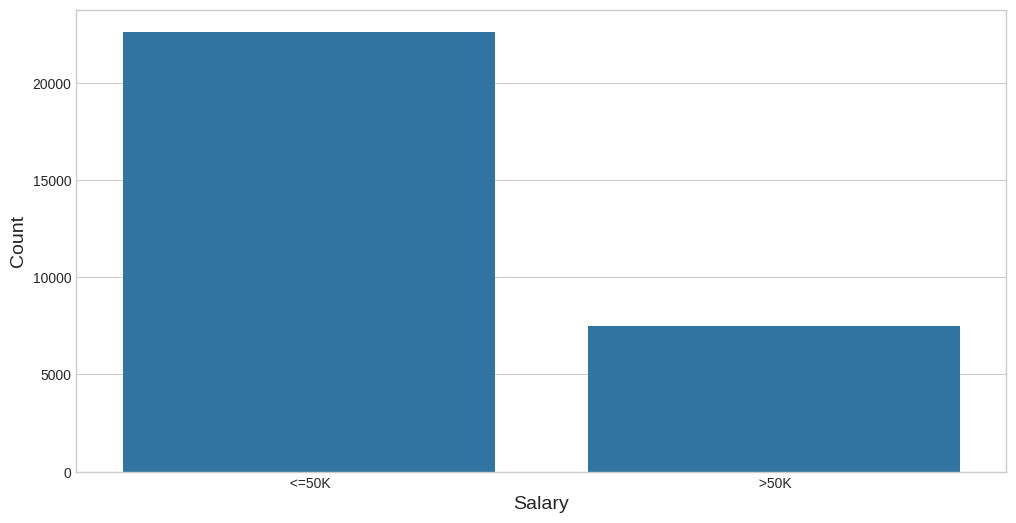

In [46]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= train_data)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

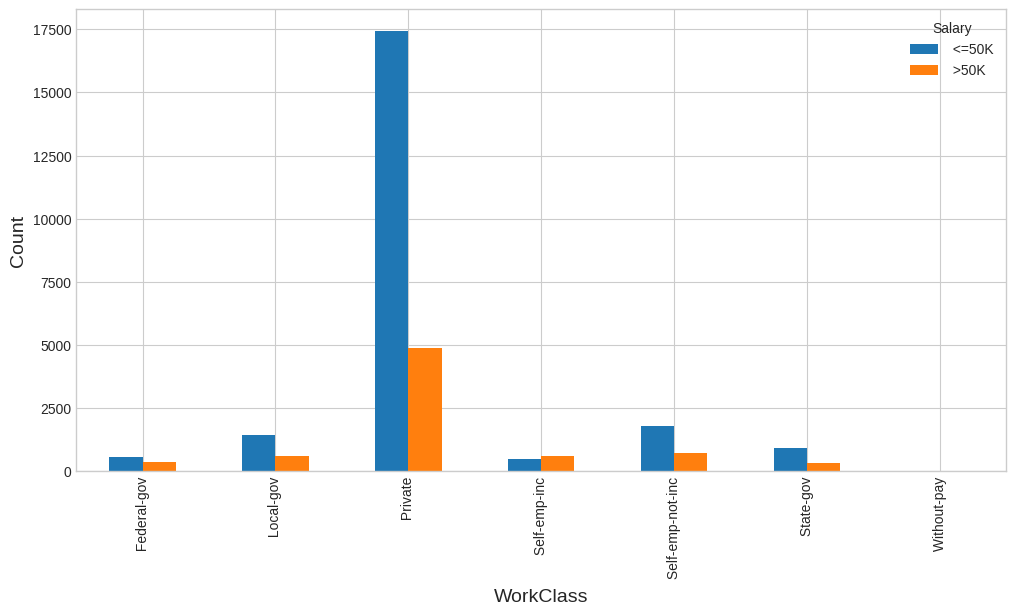

In [47]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data.workclass,train_data.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)

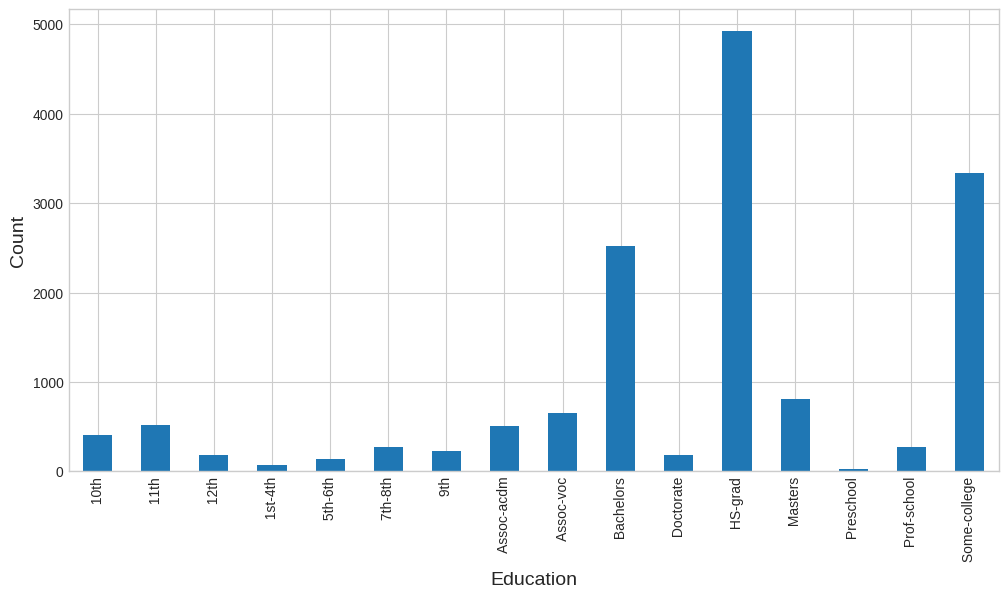

In [48]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

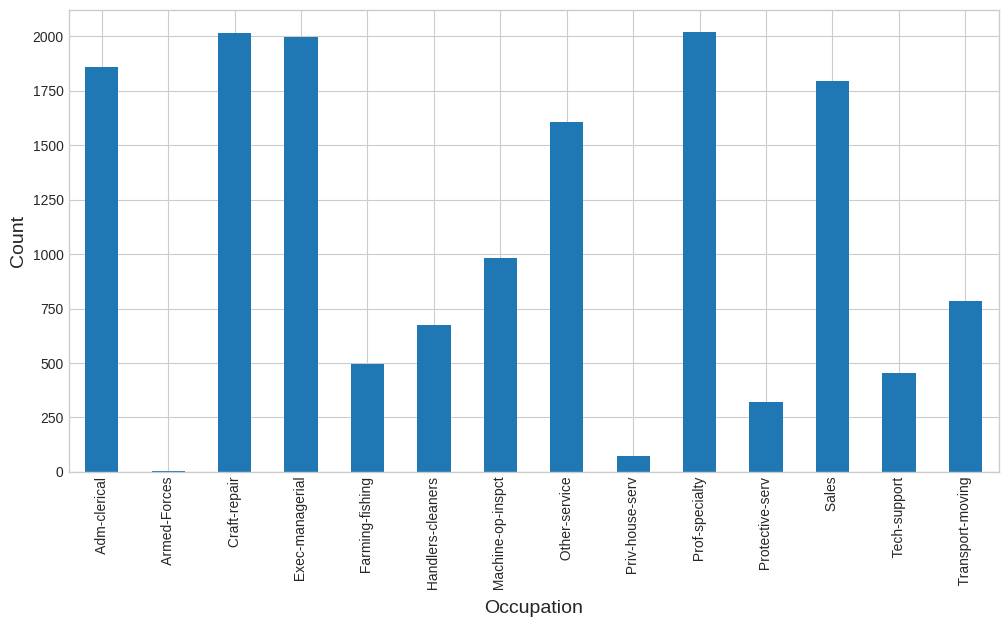

In [49]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

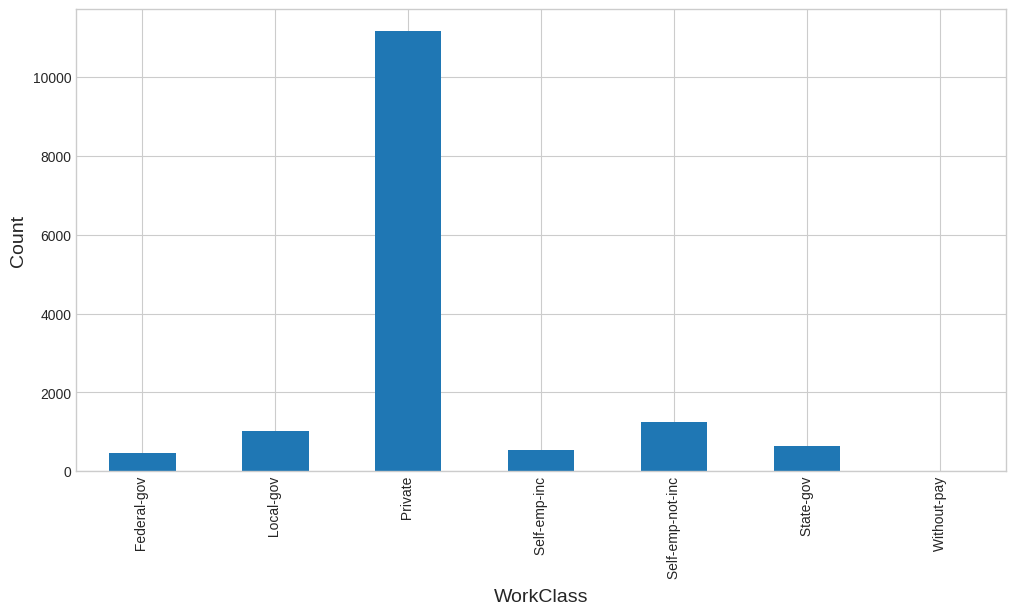

In [50]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<Axes: xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

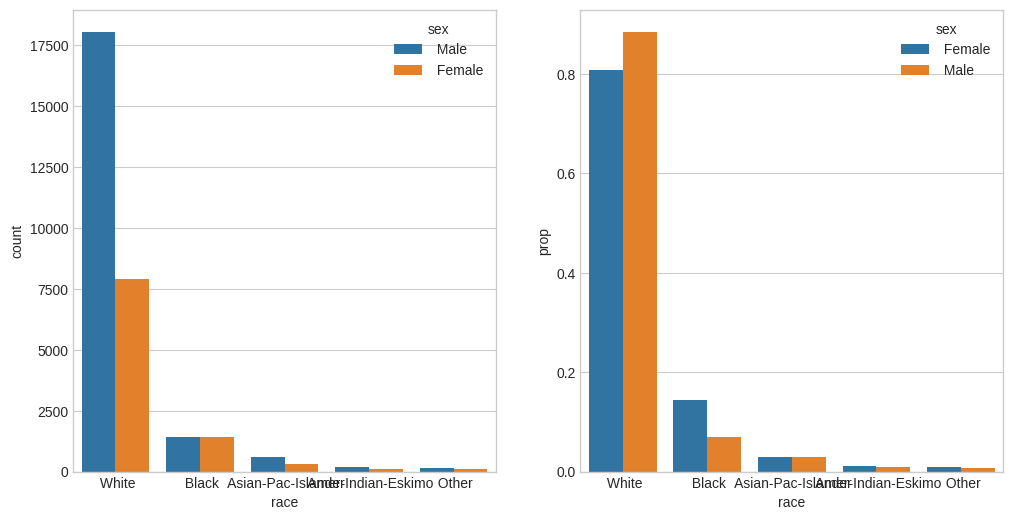

In [51]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [52]:
import pandas as pd

# Assuming 'df' is your dataframe
numeric_columns = train_data.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

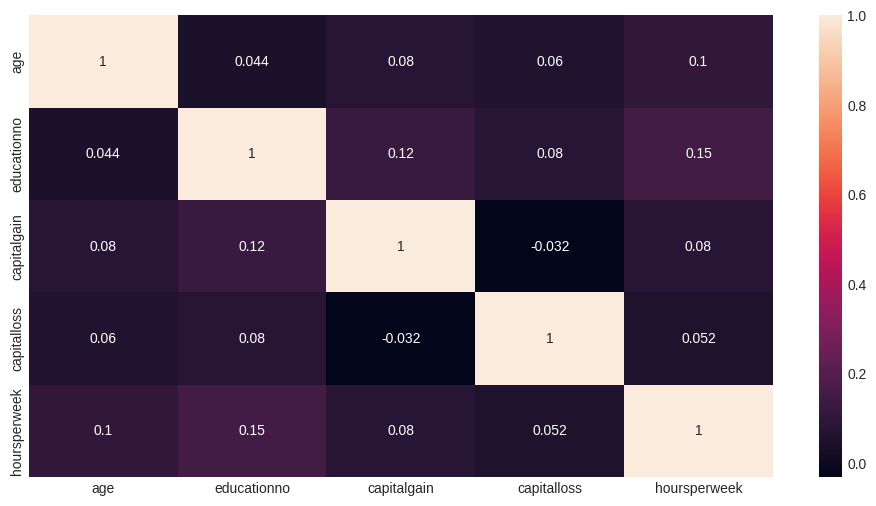

In [53]:
corr = train_data[numeric_columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
#categorical columns
columns_names=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [54]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in columns_names:
    train_data[i] = number.fit_transform(train_data[i])
    test_data[i] = number.fit_transform(test_data[i])

colnames = train_data.columns

In [55]:
mapping = {' >50K': 1, ' <=50K': 2}

In [56]:
train_data['Salary'].unique()

array([0, 1])

# Split the data into train and test data

In [57]:
X_train = train_data.iloc[:,:13]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [58]:
Y_train = train_data.iloc[:,-1]
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [59]:
X_test = test_data.iloc[:,:13]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [60]:
Y_test = test_data.iloc[:,-1]
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

# Train the SVM

In [61]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [62]:
x_train = norm_func(X_train)
x_test =  norm_func(X_test)
y_train = Y_train
y_test = Y_test

# Linear

In [63]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [64]:
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear)*100)

Accuracy: 80.98273572377158


In [68]:
print(metrics.classification_report(y_test, pred_test_linear))
print(metrics.confusion_matrix(y_test, pred_test_linear))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060

[[11003   357]
 [ 2507  1193]]


# RBF

In [69]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [70]:
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf)*100)

Accuracy: 84.32934926958832


In [72]:
svc = SVC(kernel='rbf',gamma=2, C=1)
svc.fit(x_train, y_train)

SVC(C=1, gamma=2)

In [73]:
# make predictions
prediction = svc.predict(x_test)

In [74]:
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.83      0.84      0.83     15060

[[10628   732]
 [ 1644  2056]]


In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))


Accuracy: 0.8422310756972111
Precision: 0.7374461979913917
Recall: 0.5556756756756757


In [87]:
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(x_train,y_train)

SVC(C=3.0, gamma=0.01, random_state=10)

In [88]:
y_pred=svc.predict(x_test)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     11360
           1       0.75      0.35      0.48      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.66      0.68     15060
weighted avg       0.80      0.81      0.78     15060



# Poly

In [76]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [77]:
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly)*100)

Accuracy: 84.35590969455511


In [79]:
svc = SVC(kernel='poly',degree=3,gamma="scale")
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [81]:
# make predictions
prediction_1 = svc.predict(x_test)

In [82]:
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction_1))
print(metrics.confusion_matrix(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060

[[10626   734]
 [ 1622  2078]]


In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_1))
print("Precision:",metrics.precision_score(y_test, prediction_1))
print("Recall:",metrics.recall_score(y_test, prediction_1))


Accuracy: 0.8435590969455511
Precision: 0.7389758179231863
Recall: 0.5616216216216217


# Sigmoid

In [85]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [86]:
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid)*100)

Accuracy: 57.68924302788845


The Poly kernel gives the best accuracy 84.35%